In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('.')
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import incense
from incense import ExperimentLoader
from cycler import cycler
from sklearn.manifold import TSNE
import matplotlib as mpl


In [3]:
loaded = np.load('../../Cleaned_up/data.npz')
y_valid = np.argmax(loaded['test_labels_cat'],axis=1)
y_valid

array([7, 2, 1, ..., 4, 5, 6])

In [4]:
loader = ExperimentLoader(
    mongo_uri="mongodb://localhost:27017", 
    db_name='sacred'
)

In [5]:
#query = {"$and": [
#            {"config.autoencoder_type": "Over_dim_tied_iteration"},
#           
#        ]}
#experiments=loader.find(query)

In [6]:
exp = loader.find_by_id(2)

In [7]:
exp

Experiment(id=2, name=autoencoder_test)

In [8]:
pickle_artifact = exp.artifacts['predictions_df_0'].as_type(incense.artifact.PickleArtifact)
predictions=pd.read_pickle(pickle_artifact.file,compression='gzip')

In [9]:
X_valid=predictions['predictions'][0].reshape(10000,28,28)

In [10]:
tsne = TSNE()


In [11]:
def plot_manifold(X_valid_2D,X_valid):
    plt.figure(figsize=(10, 8))
    cmap = plt.cm.tab10
    plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
    image_positions = np.array([[1., 1.]])
    for index, position in enumerate(X_valid_2D):
        dist = np.sum((position - image_positions) ** 2, axis=1)
        if np.min(dist) > 0.02: # if far enough from other images
            image_positions = np.r_[image_positions, [position]]
            imagebox = mpl.offsetbox.AnnotationBbox(
                mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
                position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
            plt.gca().add_artist(imagebox)
    plt.axis("off")
    plt.show()

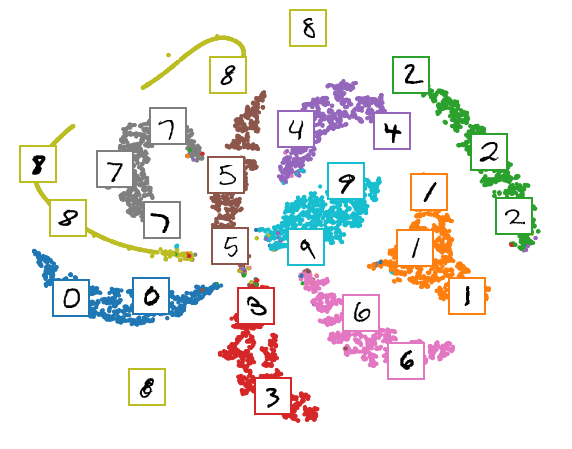

In [14]:
for counter ,compressed in enumerate(zip(predictions['predicted_output_encoder'],predictions['predictions'])):   
    print('Iteration ',counter)
    X_valid_2D_0 = tsne.fit_transform(compressed[0])
    X_valid_2D_0 = (X_valid_2D_0 - X_valid_2D_0.min()) / (X_valid_2D_0.max() - X_valid_2D_0.min())
    X_valid_0=compressed[1].reshape(10000,28,28)
    plot_manifold(X_valid_2D_0,X_valid_0)